<img align="center" src="images/course.png" width="800">

# 16720 (B)  3D Reconstruction - Assignment 5
    Instructor: Kris                          TAs: Zen (Lead), Yan, Rawal, Wen-Hsuan, Paritosh, Qichen

# Instructions

This section should include the visualizations and answers to specifically highlighted questions from P1 to P4. This section will need to be uploaded to gradescope as a pdf and manually graded (this is a separate submission from the coding notebooks).


1. Students are encouraged to work in groups but each student must submit their own work. Include the names of your collaborators in your write up. Code should <span style='color:red'>Not</span>  be shared or copied. Please properly give credits to others by <span style='color:red'>LISTING EVERY COLLABORATOR</span> in the writeup including any code segments that you discussed,  Please <span style='color:red'>DO NOT</span>  use external code unless permitted. Plagiarism is prohibited and may lead to failure of this course.

2.  **Start early!** This homework will take a long time to complete.
    
3. **Questions:** If you have any question, please look at Piazza first and the FAQ page for this homework.

4. All the theory question and manually graded questions should be included in a single writeup (this notebook exported as pdf or a standalone pdf file) and submitted to gradescope: pdf assignment. 

5. **Attempt to verify your implementation as you proceed:** If you don’t verify that your implementation is correct on toy examples, you will risk having a huge issue when you put everything together. We provide some simple checks in the notebook cells, but make sure you verify them on more complicated samples before moving forward. 

6. **Do not import external functions/packages other than the ones already imported in the files:** The current imported functions and packages are enough for you to complete this assignment. If you need to import other functions, please remember to comment them out after submission. Our autograder will crash if you import a new function that the gradescope server does not expect. 

7. Assignments that do not follow this submission rule will be **penalized up to 10\% of the total score**.


# Theory Questions (25 pts)

Before implementing our own 3D reconstruction, let's take a  look at some simple theory questions that may arise. The answers to the below questions should be relatively short, consisting of a few lines of math and text (maybe a diagram if it helps your understanding).  

<img align="center" src="images/drawing-1.png" width="800">
<center> <figcaption align="center"><b>Figure1. Figure for Q1.1. $C1$ and $C2$ are the optical centers. The principal axes intersect at point $\textbf{w}$ ($P$ in the figure).</b></figcaption> </center>




## Q1.1
Suppose two cameras fixated on a point $x$ (see Figure 1) in space such that their principal axes intersect at the  point $P$. Show that if the image coordinates are normalized so that the coordinate origin $(0, 0)$
coincides with the principal point, the $\textbf{F}_{33}$ element of the fundamental matrix is zero.

---

First off, let's talk about some basic definitions. A homogeneous image point that goes through the coordinate origin of camera 1 will be
\begin{align*}
    x_1 &= \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align*}

Another thing to note is that image coordinate line equations like $ax + by + c = 0$ consist of two parts. The first two components $(a, b)$ correspond to a direction vector perpendicular to the actual line out from the origin, and $c$ is a term that denotes distance along the vector. $c$ is not exactly distance in pixels, since there is a normalization term involving $a$ and $b$, but that's the idea.
\begin{align*}
    \ell_2 &= \begin{bmatrix} a \\ b \\ c \end{bmatrix}
\end{align*}

The important thing is that when a line passes through the image origin the distance term $c$ will be 0. With these two facts established let's look at the problem.

For the Fundamental matrix $F$ between the two cameras, this relationship should always be true:
\begin{align*}
    \ell_2 &= F x_1
\end{align*}
where $x_1$ is any pixel in the camera 1 and $\ell_2$ is an epipolar line for the corresponding point in camera 2. This relationship should hold for any $x_1$, but the $F$ matrix should stay constant. Therefore we can investigate the structure of $F$ by using an $x_1$ point with notable constraints, such as the origin.

When the origin of camera 1 is used as the $x_1$ point we know that the epipolar line should pass through the origin of camera 2 because principal axis of camera 2 is pointed at $P$. Therefore we know that the following relationship should be true:
\begin{align*}
    \begin{bmatrix} \alpha \\ \beta \\ 0 \end{bmatrix} &= F \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align*}
$\alpha$ and $\beta$ are arbitrary since we don't know how the cameras are oriented except that their centers hit the same point.

For this statement to be true, we know that $F_{3, 3}$ must be 0. This is when doing matrix multiplication to get the last vector value because whatever is in $F_{3, 1}$ and $F_{3, 2}$ gets zeroed out by the zero values in $x_1$, and the only option for $F_{3, 3} * 1 = 0$ is when $F_{3, 3}$ is 0.

---

## Q1.2
Consider the case of two cameras viewing an object such that the second camera differs from the first by a pure translation that is parallel to the $x$-axis. Show that the epipolar lines in the two cameras are also parallel to the $x$-axis. Backup your argument with relevant equations.


---

For starters, let's talk about the Essential matrix for vision. It is defined so that a point from one camera is projected into an epipolar line in the other camera's coordinates. It is also defined as a combination of the real-world rotation and translation matrices.

\begin{align*}
    \ell_2 &= E x_1  && \text{Again, $x_1$ is a point in camera 1, $\ell_2$ an epipolar line in camera 2} \\
    E &= R t_x  && \text{$R$ is rotation matrix from cam1 to cam2} \\
    & && \text{$t_x$ is the cross-product version of translation from cam1 to cam2}
\end{align*}

Well, we're assuming for the purposes of this problem that we know $R$ (it's just $I$) and we know $t_x$ (it's the cross-product version of $t = [x_t, 0, 0]$ because translation only happens along the $x$-axis). Therefore we can construct $E$.

\begin{align*}
    E &= I t_x \\
    &= t_x \\
    &= \begin{bmatrix}
        0 &   0 &    0 \\
        0 &   0 & -x_t \\
        0 & x_t &    0 \\
    \end{bmatrix}
\end{align*}

Now let's examine the epipolar line $\ell_2$ formed by an **arbitrary** pixel value $x_1 = [x, y, 1]$ in camera 1.

\begin{align*}
    \ell_2 &= E x_1 \\
    &= \begin{bmatrix}
        0 &   0 &    0 \\
        0 &   0 & -x_t \\
        0 & x_t &    0 \\
    \end{bmatrix}
    \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} \\
    &= \begin{bmatrix} 0 \\ -x_t \\ y x_t \end{bmatrix} \\
    &= \begin{bmatrix} 0 \\ \frac{-1}{y} \\ 1 \end{bmatrix} \\
\end{align*}

We can see two things here:
1. The translation distance doesn't matter, it doesn't change the epipolar line at all
2. No matter what, there is no $x$ component to the line equation, only $y$ values. As discussed in Q1.1, lines are perpendicular to the $(a, b)$ vector in the line equation. This means that there is no $y$ component in the epipolar line, it travels only along $x$, which is what we wanted to show.

---

## Q1.3
Suppose we have an inertial sensor which gives us the accurate extrinsics $\mathbf{R}_i$ and $\textbf{t}_i$ (see Figure 2), the rotation matrix and translation vector of the robot at time $i$. What will be the effective rotation ($\textbf{R}_{rel}$) and translation ($\textbf{t}_{rel}$) between two frames at different time stamps? Suppose the camera intrinsics ($\textbf{K}$) are known, express the essential matrix ($\textbf{E}$) and the fundamental matrix ($\textbf{F}$) in terms of $\textbf{K}$, $\textbf{R}_{rel}$ and $\textbf{t}_{rel}$.

<img align="center" src="images/F_E.png" width="500">
<center> <figcaption align="center"><b>Figure 2. Figure for Q1.3. $C1$ and $C2$ are the optical centers. The rotation and the translation is obtained using inertial sensors. $\textbf{R}_{rel}$ and $\textbf{t}_{rel}$ are the relative rotation and translation between two frames.</b></figcaption> </center>

---

As discussed before, $E$ is defined as

\begin{align*}
    E &= R t_x  && \text{$R$ is rotation matrix from cam1 to cam2} \\
    & && \text{$t_x$ is the cross-product version of translation from cam1 to cam2}
\end{align*}

A really important caveat is that these terms express the relationship between these two frames. $R$ needs to be the rotation from frame 1 to frame 2, and $t$ needs to be expressed in the camera frame, not in the world frame like some students have been discussing. There's actually an interesting dichotomy that I ran into when digging into this problem. You can write a transformation as either

1. $Rx + t$ - This implies that $t$ is defined in the *parent/upstream* frame
2. $R(x + t)$ - This implies that $t$ is defined in the *child/downstream* frame

I'll write these as $Rx + t_p$ and $R(x + t_c)$. This makes sense, because you can go between these two representations by distribution: $Rx + t_p = R(x + t_c) = Rx + Rt_c$. It makes sense that $t_p$ (translation in the parent frame) is equivalent to $Rt_c$, that's a valid rotation.

This dichotomy is important, and affects how the Essential matrix is defined. I'll show that these two statements have correct coordinate interpretations with some plots. Note that the function that plots the reference frames uses these two definitions based on whether the $t$ vector is supposed to be in the parent frame.

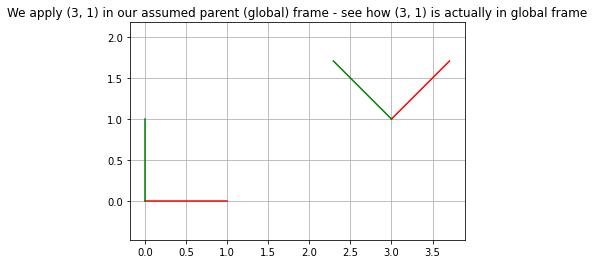

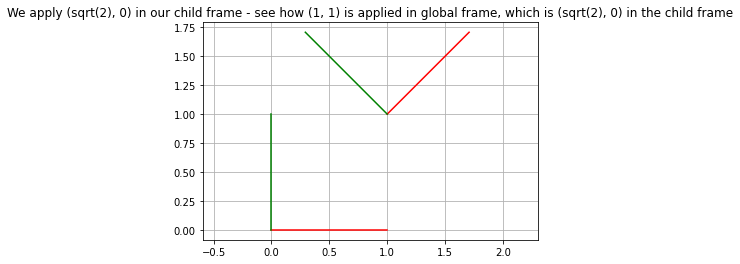

In [22]:
from matplotlib import pyplot
import numpy


def Rz(theta):
    return numpy.array([[numpy.cos(theta), -numpy.sin(theta)],
                        [numpy.sin(theta),  numpy.cos(theta)]])
def T(a, b): return numpy.array([[a], [b]])
pi = numpy.pi

def frame(r, t, axis, scale=1, t_in_parent_frame=True):
    if t_in_parent_frame:
        origin = r @ T(0, 0) + t
        xaxis = r @ T(scale, 0) + t
        yaxis = r @ T(0, scale) + t
    else:
        origin = r @ (T(0, 0) + t)
        xaxis = r @ (T(scale, 0) + t)
        yaxis = r @ (T(0, scale) + t)
    axis.plot([origin[0], xaxis[0]], [origin[1], xaxis[1]], "r")
    axis.plot([origin[0], yaxis[0]], [origin[1], yaxis[1]], "g")


# First show that Rx + t has t defined in the parent frame
figure, axis = pyplot.subplots()
frame(numpy.eye(2), T(0, 0), axis)  # Origin
frame(Rz(pi/4), T(3, 1), axis, t_in_parent_frame=True)
axis.axis("equal")
axis.grid()
pyplot.title("We apply (3, 1) in our assumed parent (global) frame - "
             "see how (3, 1) is actually in global frame")
pyplot.show()

# Then show that R(x + t) has t defined in the child frame
figure, axis = pyplot.subplots()
frame(numpy.eye(2), T(0, 0), axis)
frame(Rz(pi/4), T(numpy.sqrt(2), 0), axis, t_in_parent_frame=False)
axis.axis("equal")
axis.grid()
pyplot.title("We apply (sqrt(2), 0) in our child frame - "
             "see how (1, 1) is applied in global frame,"
             " which is (sqrt(2), 0) in the child frame")
pyplot.show()

So we've established that $Rx + t$ implies $t$ is defined in the parent frame and $R(x+t)$ implies $t$ is defined in the child frame. So now let's look at how the Essential matrix is calculated.

In [Wikipedia](https://en.wikipedia.org/wiki/Essential_matrix#Derivation_and_definition) it says "\[for\] the normalized cameras their respective coordinate systems are related by means of a translation and rotation. This implies that the two sets of 3D coordinates are related as"

\begin{align*}
    \bar{x}' &= R(\bar{x} - t) \\
    E &= R [t]_{\times} \\
\end{align*}

That heavily implies that the $t$ being used for $[t]_{\times}$ is defined in the *child* frame in order for the Essential matrix derivation to be correct. Now lets check the class notes... Okay, if we look in slide 133 in lecture 17 it also starts off defining rigid motion as $x' = R(x - t)$ and ending with $E = R[t_{\times}]$. I'm positive there is an equivalent relationship for $E$ when rigid motion is defined as $Rx + t$, but I'm fairly certain after these checks that when people refer to $E$ as $R t_{\times}$ then $t$ must be defined in the child frame.

<!-- If this weren't true, and the translation vector could be expressed in some coordinate frame like the world coordinate frame, then imagine two camera frames fixed relative to each other ($C_i$ and $C_j$). Since they are fixed relative to each other, then the essential matrix should stay constant. However, let's say the world frame orientation was changing relative to the fixes $C_i, C_j$ pair. If $t_i$ could be expressed in the world frame then $E = R t_x$ would be changing as well, which is invalid. -->

---

**Caveat**: There are multiple different assumptions that could be made about **which frames** the rotation matrix $R_i$ and translation vector $t_i$ **returned by the sensor are defined in**, and it's unclear what is correct. I'm going to go through and assume that $R_i$ and $t_i$ are both defined in the world frame, but other starting assumptions will lead you to other equivalent solutions.

---

The first assumption that could be made is that the rotation matrix and translation vector are both
1. Defined from the world frame to the camera frame and (importantly)
2. Defined in the world frame axes

In that case, let's start off by finding the rotation matrix $R_{rel}$. We want to get this from the frame of camera 1 to camera 2, regardless of the world frame. When you're stacking transformations on top of each other, you stack additional transforms on the left in a chain, like $R_w^4 = R_3^4 R_2^3 R_1^2 R_w^1$, where $R_2^3$ is the transform from frame 1 to 2. Thus in this case we would have

\begin{align*}
    R_{rel} R_i &= R_j  && \text{Assuming $R_j$ is further along the chain} \\
    R_{rel} &= R_j R_i^{-1} \\
    &= R_j R_i^T
\end{align*}

Since we started off with world-frame camera origin coordinates $t_i$ and $t_j$ (in this set of assumptions) then

\begin{align*}
    \Delta t_w &= t_j - t_i
\end{align*}

represents the translation from $i$ frame to $j$ frame *in world frame coordinates*. As we discussed in great deal above, in order to calculate the $E$ matrix we want to define $t$ in the child frame, which in this case is $j$. Now, generally speaking, if you have a rotation matrix from frame $a$ to $b$ ($R_a^b$) and a point $p_b$ defined in frame $b$, then $R_a^b \cdot p_b = p_a$, a.k.a. the point re-defined in frame $a$. Thus $p_b = R_a^{bT} p_a$. In this case we have a rotation matrix from the world frame to frame $j$, and a vector defined in the world frame, so

\begin{align*}
    R_j^T \Delta t_w &= \Delta t_j  && \text{The vector in reference frame $j$} \\
    &= t_{rel} \\
\end{align*}

Once $R_{rel}$ and $t_{rel}$ are defined, it's very simple to define $E$ and $F$ matrices using the standard equations:

\begin{align*}
    E &= R_{rel} [t_{rel}]_{\times} \\
    &= R_j R_i^T [R_j^T (t_j - t_i)]_{\times} \\
    F &= K_j^{-T} E K_i^{-1}
\end{align*}

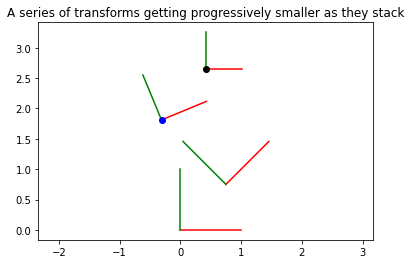

In [56]:
# Define successive transforms
Rw1 = Rz(pi/4)
Tw1 = T(0.75, 0.75)

R12 = Rz(-pi/8)
T12 = T(0, 1.5)

R23 = Rz(-pi/8)
T23 = T(1, 0.5)

# Stack the series of rotations and translations
#---------------------------
# The Rw1 @ T(0, 0) is explicitly useless, but it helped me
# keep my mind straight that we were projecting the origin
#---------------------------
# NOTE: My translations above are defined in the parent frame because
# I am using Rx + t
Rw2 = Rw1 @ R12
Tw2 = Rw1 @ (R12 @ T(0, 0) + T12) + Tw1

Rw3 = Rw2 @ R23
Tw3 = Rw2 @ (R23 @ T(0, 0)+ T23) + Tw2

# Plot stacked transforms progressively smaller
figure, axis = pyplot.subplots()
frame(numpy.eye(2), T(0, 0), axis)  # World origin
frame(Rw1, Tw1, axis)
frame(Rw2, Tw2, axis, scale=0.8)
axis.plot(*Tw2.tolist(), "bo")
frame(Rw3, Tw3, axis, scale=0.6)
axis.plot(*Tw3.tolist(), "ko")
axis.axis("equal")
pyplot.title("A series of transforms getting progressively smaller as they stack")
pyplot.show()

Now armed with this knowledge we can attempt two tests.
1. If we calculate $R_{rel}$ as $R_jR_i^T$ will we get the correct relative transform? In this case, based on our examples shown above frame $i$ is the blue dot ($R_{w2}, T_{w2}$) and frame $j$ is the black dot ($R_{w3}, T_{w3}$). $R_{w3} R_{w2}^T$ should result in a rotation of $-\pi/16$.
2. If we calculate $t_{rel}$ as $R_j^T(t_j - t_i)$, then we should get the last translation (1, 0.5) but expressed in the *child* frame, which is rotated by $\pi/16$. I haven't calculated this, but just by eyeballing it it looks like it should be about $(0.8, 0.8)$.

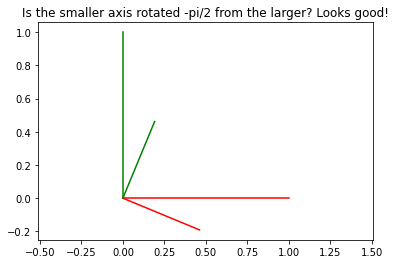

In [57]:
Rrel = Rw3 @ Rw2.T

# First make a plot showing Rrel
figure, axis = pyplot.subplots()
frame(numpy.eye(2), T(0, 0), axis)
frame(Rrel, T(0, 0), axis, 0.5)
axis.axis("equal")
pyplot.title("Is the smaller axis rotated -pi/2 from the larger? Looks good!")
pyplot.show()

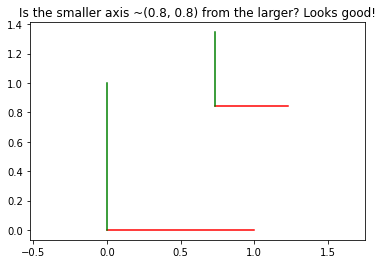

In [58]:
Trel = Rw3.T @ (Tw3 - Tw2)

# First make a plot tested that Trel is coorect and in the child frame
figure, axis = pyplot.subplots()
frame(numpy.eye(2), T(0, 0), axis)
frame(numpy.eye(2), Trel, axis, 0.5)
axis.axis("equal")
pyplot.title("Is the smaller axis ~(0.8, 0.8) from the larger? Looks good!")
pyplot.show()

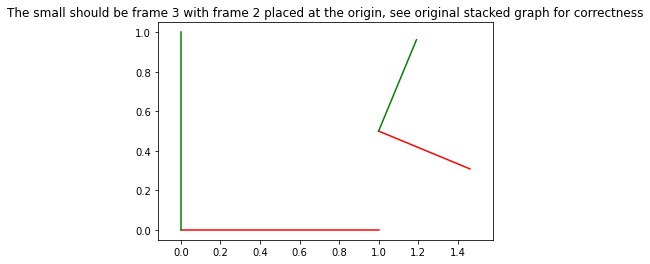

In [59]:
# Combination time! This should be frame 3 with frame 2 placed at the origin
figure, axis = pyplot.subplots()
frame(numpy.eye(2), T(0, 0), axis)
frame(Rrel, Rrel @ Trel, axis, 0.5)
axis.axis("equal")
pyplot.title("The small should be frame 3 with frame 2 placed at the origin, see"
             " original stacked graph for correctness")
pyplot.show()

There! We've shown that $R_{rel} = R_jR_i^T$ and $t_{rel} = R_j^T(t_j - t_i)$ both got good-looking relative transformations **when** you have $R_i, t_i, R_j, t_j$ in the world frames and you define $E = R[t]_{\times}$.

Once again, just to restate the punchline, you can define $E$ and $F$ like so:

\begin{align*}
    E &= R_{rel} [t_{rel}]_{\times} \\
    &= R_j R_i^T [R_j^T (t_j - t_i)]_{\times} \\
    F &= K_j^{-T} E K_i^{-1}
\end{align*}

---

<!-- However, on Piazza (@693) it was mentioned that we could assume $x_i = R_i X + t_i$, which means -->

---

## Q1.4

Suppose that a camera views an object and its reflection in a plane mirror. Show that this situation is equivalent to having two images of the object which are related by a skew-symmetric fundamental matrix. You may assume that the object is flat, meaning that all points on the object are of equal distance to the mirror (**Hint:** draw the relevant vectors to understand the relationship between the camera, the object, and its reflected image.)





---

Worked on this problem with Nikhil and David.

Let's start by reframing the problem, then drawing a diagram. First thing of interest, one way to think about looking at an object in a mirror is by pretending you're looking straight at an object that is through the mirror, literally in the "mirrored" position across the mirror. Another thing to discuss is what the question is asking. I think what it's saying is that when you imagine seeing the original image and this mirrored version in the original camera, you can instead think about that as seeing the original image twice: once in the original camera and once in a virtual camera that mimics the view you *would* have gotten from the mirrored object. Explanation in this diagram:

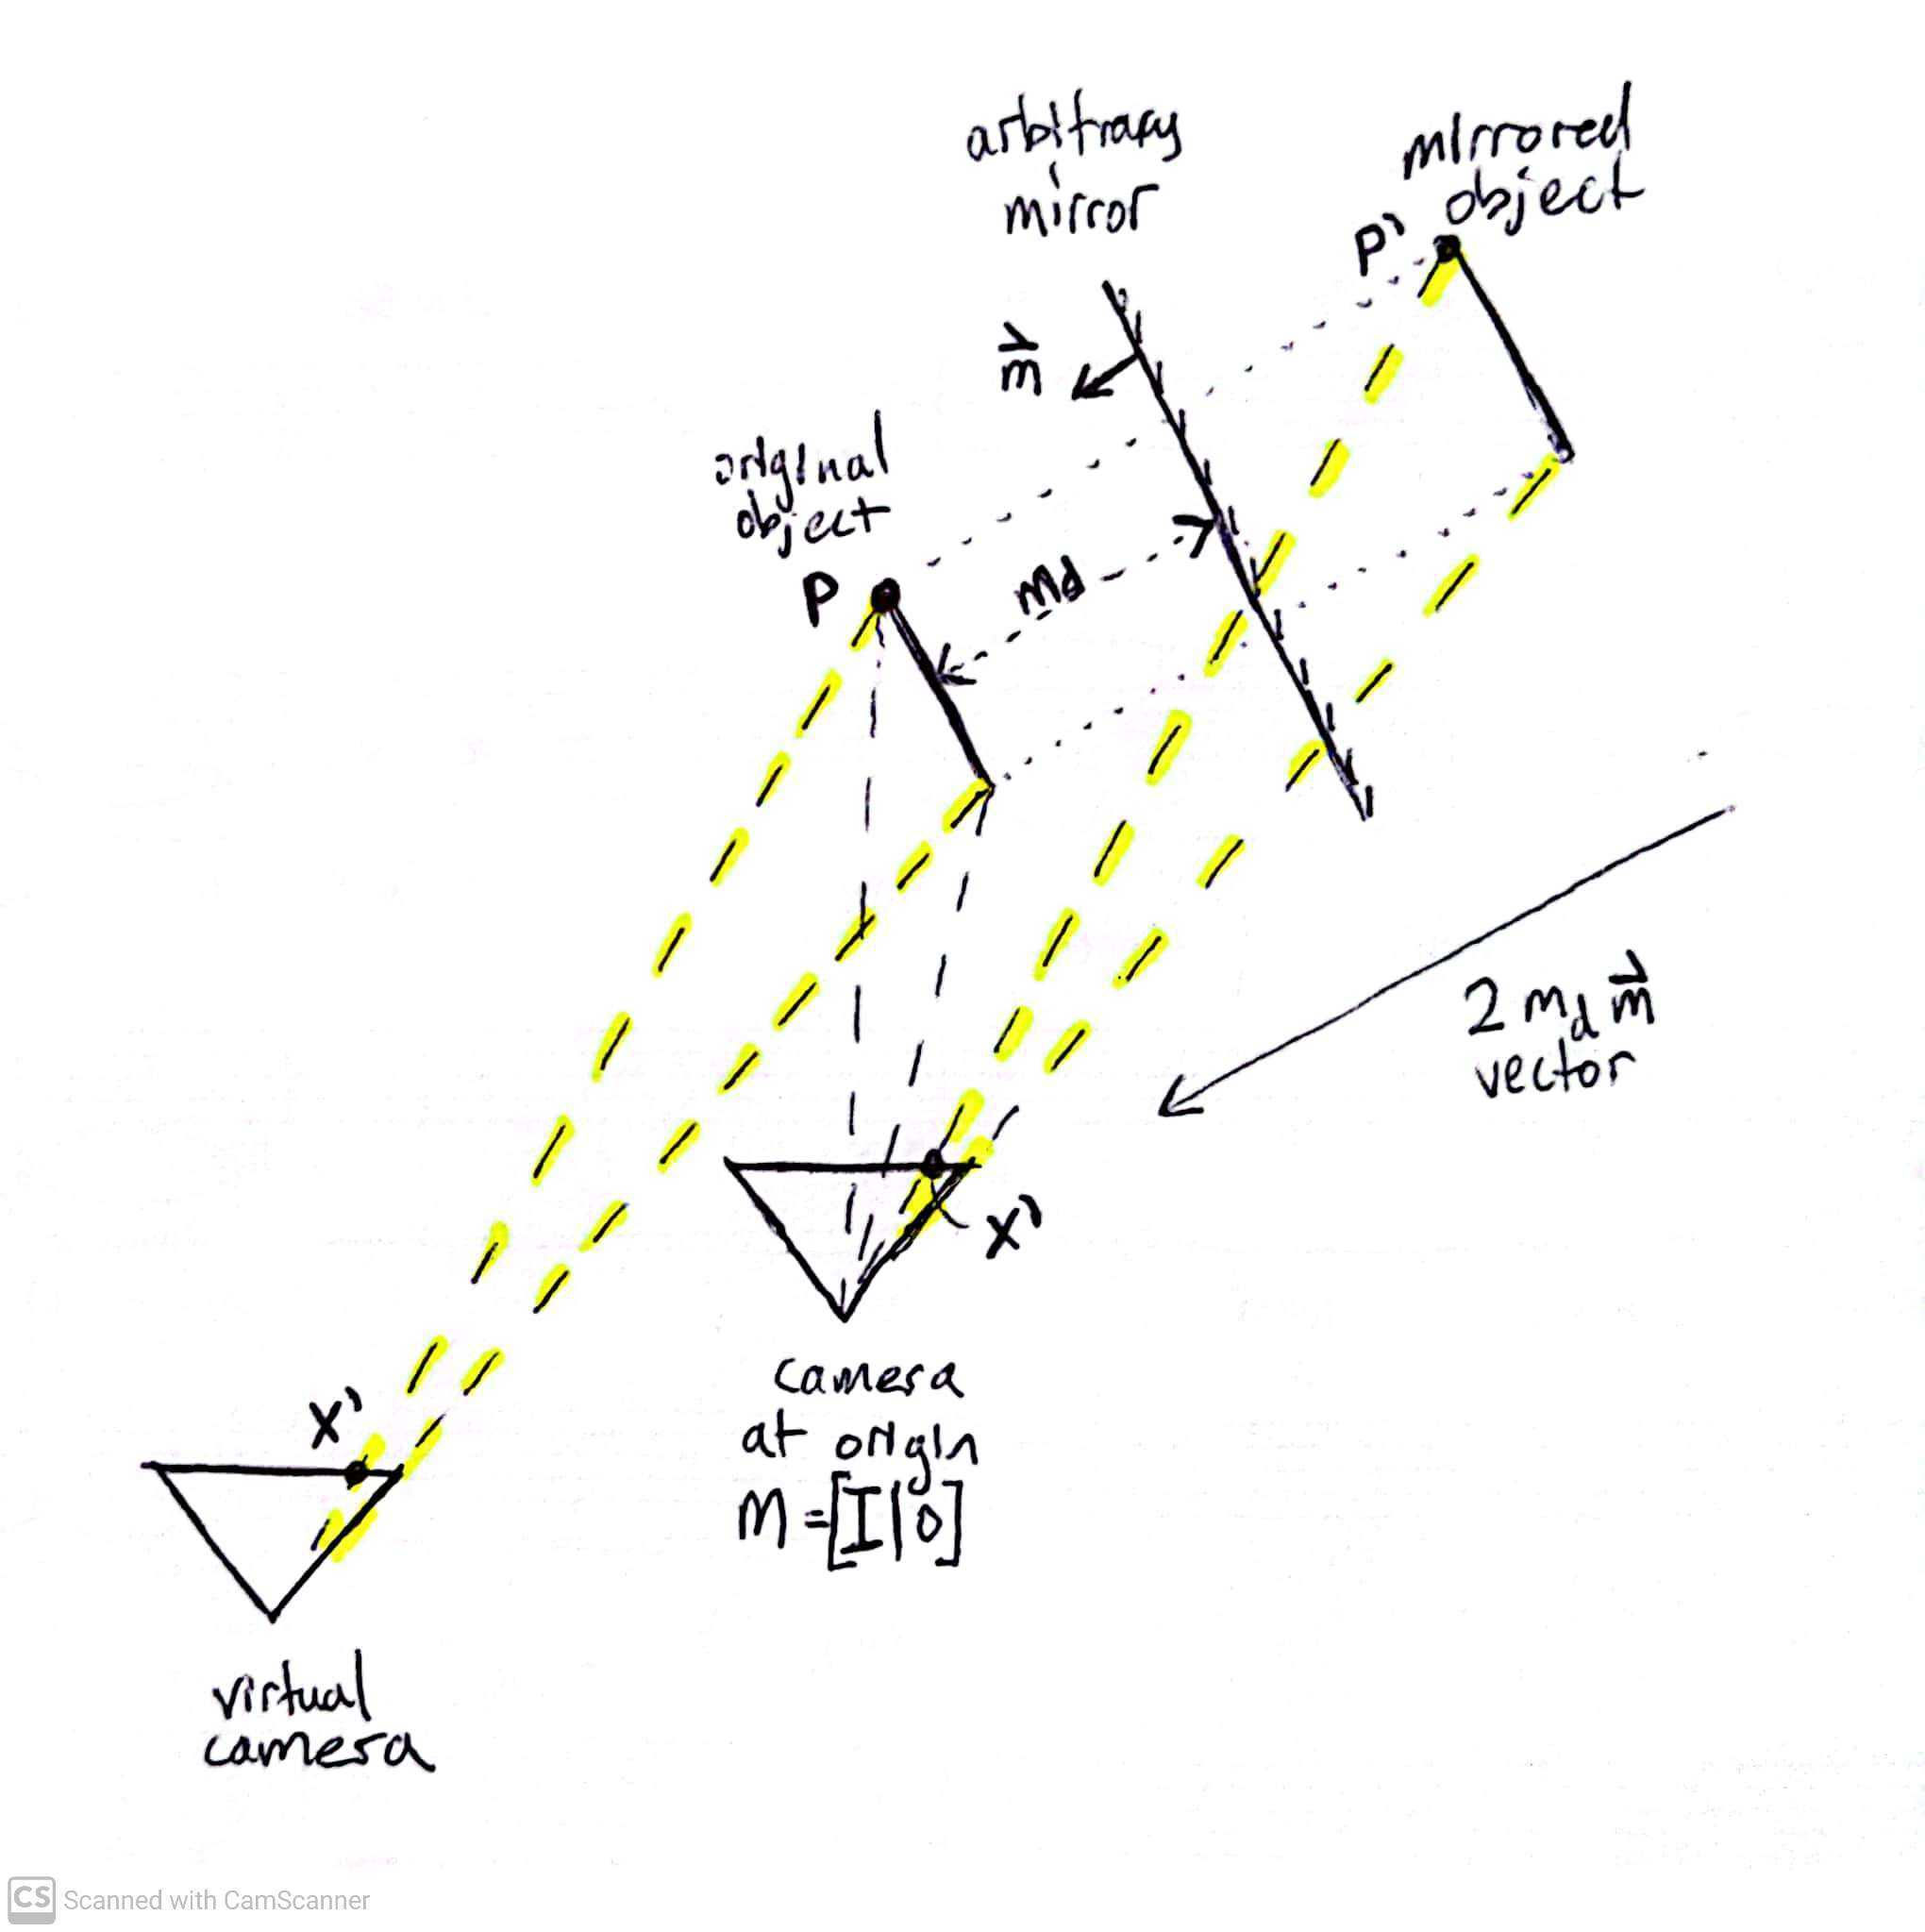

Here you can see that the original camera started off with two views - one straight to the original object and one to the mirrored object (marked in yellow). Our task (I think) is to find a virtual camera that has the same view onto the original object that the  (also marked in yellow). Objects are assumed to be infinitely thin and visible from both sides, I believe from an office hours this is correct.

So let's define some terms. The camera matrix that expresses the original camera is $C$, and contains the intrinsic and extrinsic parameters $C = KM$ as normal. In this case $M$ is the identity since we arbitrarily placed the camera at the origin. Therefore if we chose an arbitrary point $P'$ on the *mirrored* object, it will project onto the camera at the pixel coordinates

\begin{align*}
    x' \equiv C P'
\end{align*}

Now let's imagine the virtual camera. It will have camera matrix $C'$, defined as $C' = KM'$. $K$ will be the same for both cameras, but $M'$ will be different than $M$ (different extrinsics) representing that we could rotate or translate the virtual camera. As a way of constraining ourselves, we are going to say that we want to replicate the pixel $x'$ in the virtual camera, but using the point $P$ instead of $P'$. This is equivalent to saying that we want the virtual camera to have the same view onto the original object as the origin camera has on the mirrored object. Put into math,

\begin{align*}
    x' \equiv C' P
\end{align*}

Alright, let's start combining and simplifying these expressions. In the end we want to solve for $C'$ (really $M'$, the extrinsics) that will result in this "matched view" that we're looking for.

\begin{align*}
    x' &\equiv C P' \\
    &= \phi_1 C P'  && \text{Arbitrary scale factor} \\
    x' &\equiv C' P \\
    &= \phi_2 C' P  && \text{Arbitrary scale factor} \\
    C' P &= \phi C P'  && \phi = \phi_1 / \phi_2 \\
\end{align*}

At this point, let's examine the mirror. Since the object is parallel to the mirror, and given a unit direction vector $\vec{m}$ perpendicular to the mirror plane, we know that every point $P'$ on the mirrored object is $2 m_d \vec{m}$ away from $P$. Therefore $P = P' + t$, where $t = 2 m_d \vec{m}$. Let's substitute $P' = P-t$ into the equation.

\begin{align*}
    C' P &= \phi C (P - t) \\
    K M' P &= \phi K M (P-t)  && \text{Split $C$ into $KM$ on both sides)} \\
    M' P &= \phi M (P-t)  && \text{Then cancel $K$ (always invertible, $phi$ is a scalar)}
\end{align*}

Now remember, the original camera is at the origin, which makes $M$ not quite identity, but instead $[I | 0]$ That means that the homogeneous 3D ($4\times1$) points $P$ and $t$ will be squished down to a 3D ($3\times1$) vectors. No matter what was in the 4th row of $P$ or $t$ it will be wiped out by the 4th column of zeros in $M$. I'm going to call these squished vectors $P_{012} = MP$ and $t_{012} = Mt$.

Now we have $M' P = \phi (P_{012}-t_{012})$, which is pretty much all we need to solve for $M'$. This is because of the structure of $M'$, which we know is a rotation matrix and a translation vector, $M' = [R|T]$. This is a little tricky, but imagine we are changing the point $P$ around on the left side, and consistently seeing $P_{012} - t_{012}$ appear on the right. For any single solution you could solve it with an arbitrary $M'$ matrix, but to solve it for every point $P$, the only way for that to happen is if we have $M' / \phi = [I | -t_{012}]$. The $T$ component needs to be constant indepedent of the $P$ value, which can only happen if it's stuck off to the right of $M'$ in the homogeneous component. So this means we know that for the system to be satisfied $R$ for the virtual camera must be $I$ and the translation must be $-t_{012}$!

There is one last problem, which is dealing with the scale factor. This is a bit hand-wavy, but I believe that
1. since the extrinsic matrix $M'$ has 6 degrees of freedom and
2. since $\phi M (P-t)$ has 2 degrees of freedom (vector in 3-space, minus one DoF for the scale factor)
3. therefore we need to know three points on the object (assuming they're independent) that we want to match in order to rigidly specify the position of the virtual camera.

Again, this is a little hand-wavy, but I think it makes sense from a counting-DoF perspective. You can also think about needing (non-collinear) 3 points in 3D space to fully specify a plane.

Okay, the last part of the question is asking us to show that the original camera and virtual camera are **related by a skew-symmetric fundamental matrix**. We know the rotation matrix for the virtual camera is $I$ and the translation is $-t_{012} = - 2m_d \hat{m}$. Therefore when we define the Fundamental matrix from the Essential matrix we will see that at it's root it is skew-symmetric because of the $[t]_{\times}$ term in $E$.

\begin{align*}
    F &= K^{-T} E K^{-1} \\
    E &= R [t]_{\times} \\
    &= [-t_{012}]_{\times} \\
\end{align*}

So we know $E$ is skew-symmetric in this case, and therefore if $K^{-T} E K^{-1}$ is also skew-symmetric we are all good. The $K$ matrices are upper-triangular so I'll bet there are some identities that help us here, but I went for what I thought was easier and manipulated the equations symbolically in sympy. If you look at the sympy code and output below, this shows that for arbitrary values in $K$ and $[t]_{\times}$ the end result is skew-symmetric. This means we are all good and $F$ is skew-symmetric for the situation described!

In [3]:
import numpy
from sympy import Matrix, Symbol, simplify


# Define K
fx = Symbol("fx")
fy = Symbol("fy")
cx = Symbol("cx")
cy = Symbol("cy")
K = Matrix([
    [fx, 0, cx],
    [0, fy, cy],
    [0,  0,  1],
])

# Define E
a = Symbol("a")
b = Symbol("b")
c = Symbol("c")
E = Matrix([
    [ 0, -c,  b],
    [ c,  0, -a],
    [-b,  a,  0],
])

# Combine them (for arbitrary values)
KEK = simplify(K.transpose().inv() * E * K.inv())

# First off, let's try and view the matrix
print("First, let's view F. Does it look skew-symmetric?:")
for row in numpy.array(KEK):
    print("{:>30} {:>30} {:>30}".format(*[str(r) for r in row]))
print("")

print(f"Another tactic. F + F^T. If this is zero, F is skew-symmetric!\n{simplify(KEK + KEK.transpose())}")

First, let's view F. Does it look skew-symmetric?:
                             0                     -c/(fx*fy)          (b*fy + c*cy)/(fx*fy)
                     c/(fx*fy)                              0         -(a*fx + c*cx)/(fx*fy)
        -(b*fy + c*cy)/(fx*fy)          (a*fx + c*cx)/(fx*fy)                              0

Another tactic. F + F^T. If this is zero, F is skew-symmetric!
Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]])


# Coding Questions (30 pt)

### Q1.1: The Eight Point Algorithm

<span style='color:red'>**Output:**</span> In your write-up: Write your recovered $\textbf{F}$ and include an image of some example outputs of displayEpipolarF.

Recovered $\textbf{F}$:
\begin{align*}
    \begin{bmatrix}
        -0.     &  0.     & -0.2519 \\
         0.     & -0.     &  0.0026 \\
         0.2422 & -0.0068 &  1.     \\
    \end{bmatrix}
\end{align*}

Error: 0.3989503498989335

Example outputs from `displayEpipolarF()`:

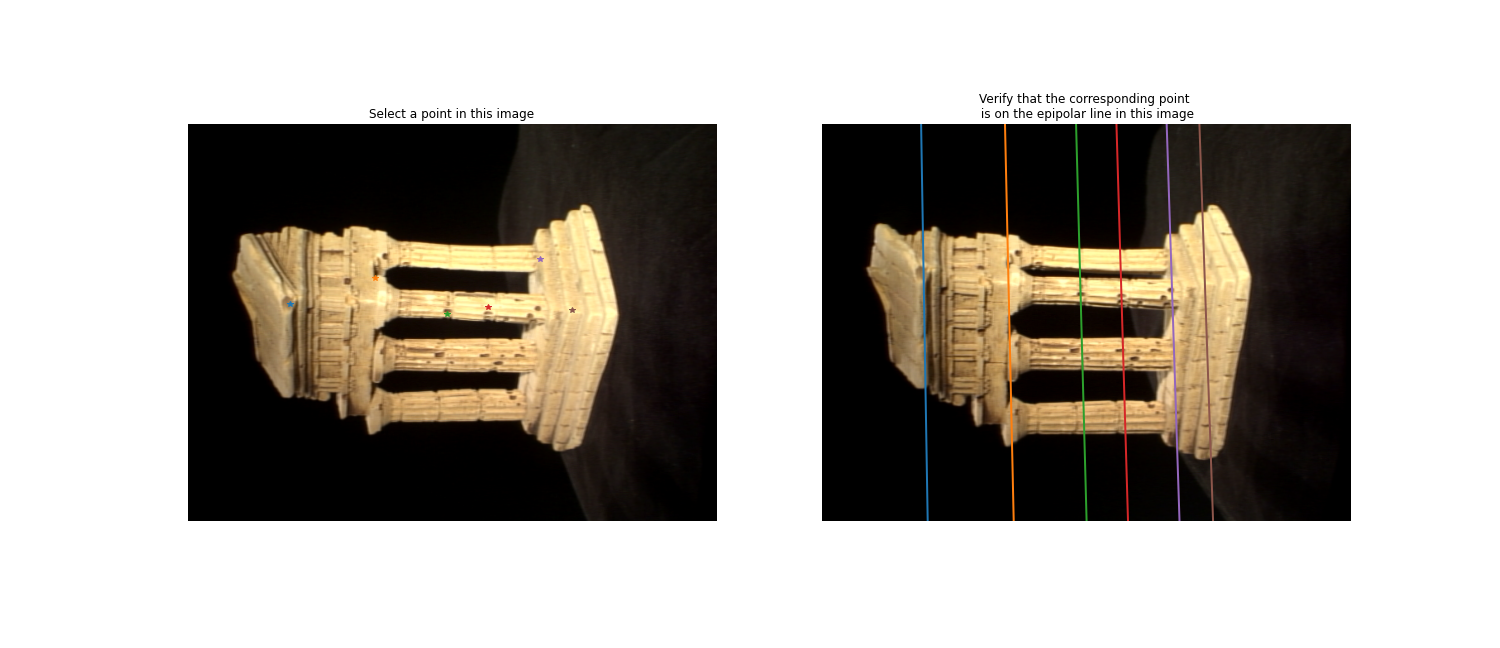

### Q1.2: The Seven Point Algorithm
<span style='color:red'>**Output:**</span> In your write-up: Print your recovered $\textbf{F}$ and include an image output of `displayEpipolarF`.

Recovered $\textbf{F}$

\begin{align*}
    \begin{bmatrix}
        0.     &  0.     & -0.3221 \\
        0.     & -0.     &  0.0006 \\
        0.3101 & -0.0036 &  1.     \\
    \end{bmatrix}
\end{align*}

Error: 0.6612102875496493

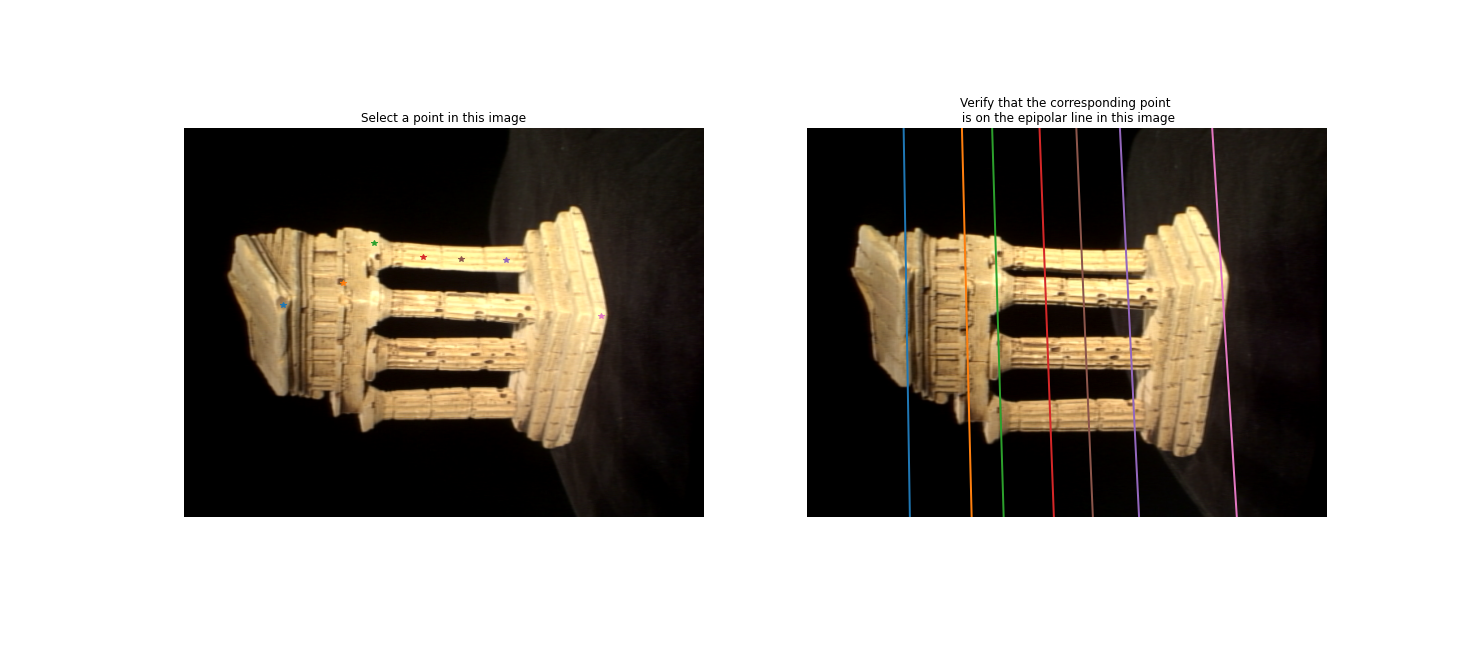

### Q2.2 Triangulation and find M2 

<span style='color:red'>**Output:**</span> In your write-up: Write down the expression for the matrix $\mathbf{A}_i$

Basing my work for $A_i$ on page 65 in lecture 17, discussing triangulation. Definitions:
* $C$ is a $3\times4$ camera matrix for camera 1
* $C'$ is a $3\times4$ camera matrix for camera 2
* $P$ is a length 3 vector for a point in camera 1
* $P'$ is a length 3 vector for a point in camera 2

$A_i$ will be a $4 \times 4$ matrix in the end. Note that $P_x$ indicates selecting the $x$th value (scalar) from $P$. Meanwhile $C_x$ indicates the $x$th *row* from $C$.
\begin{align*}
    A_i = \begin{bmatrix}
        P_1 C_2 - C_1 \\
        C_0 - P_0 C_2 \\
        P'_1 C'_2 - C'_1 \\
        C'_0 - P'_0 C'_2 \\
    \end{bmatrix}
\end{align*}

### Q2.3 Epipolar Correspondence

<span style='color:red'>**Output:**</span> In your write-up, include a screenshot of `epipolarMatchGUI`
with some detected correspondences.


Here are some detected correspondences, look good to me:

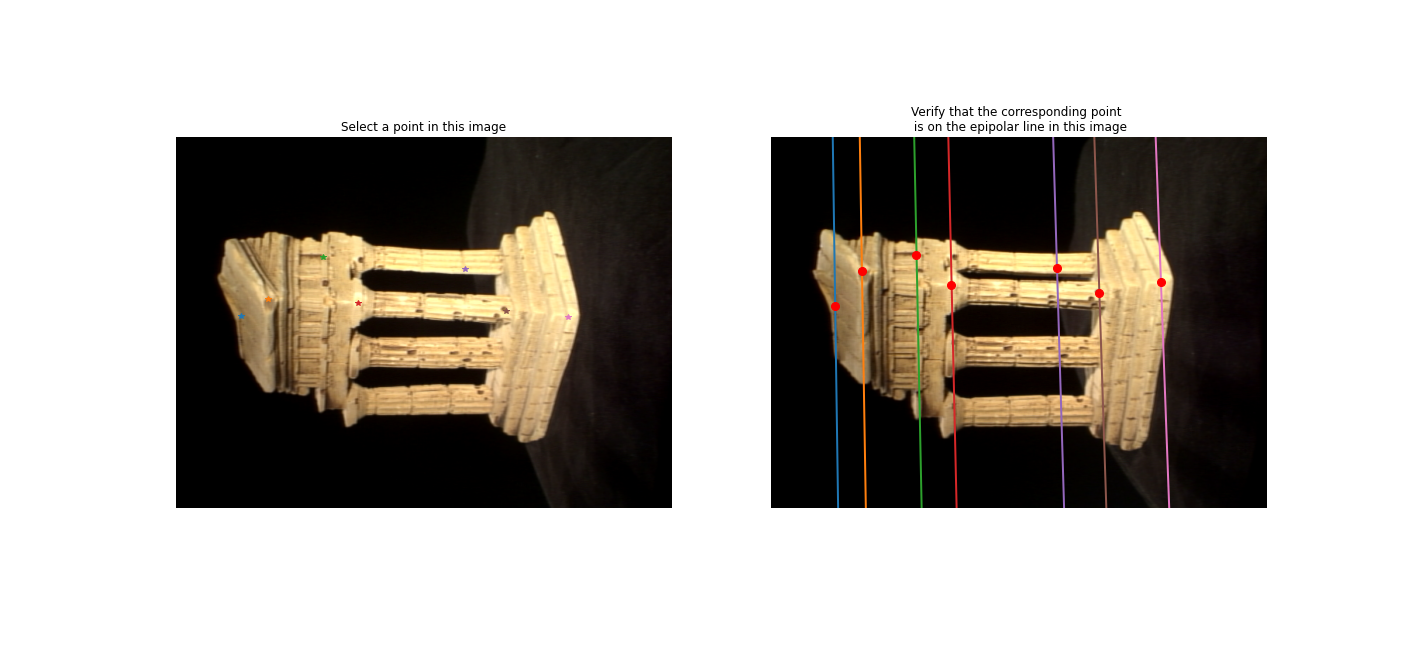

### Q2.4 3D Visualization

<span style='color:red'>**Output:**</span> In your write-up: Take a few screenshots of the 3D visualization
so that the outline of the temple is clearly visible.

Here are a collection of images of the 3D visualization showing the temple from multiple angles. The 3D reconstruction looks pretty good to me, although there are a few bad points.

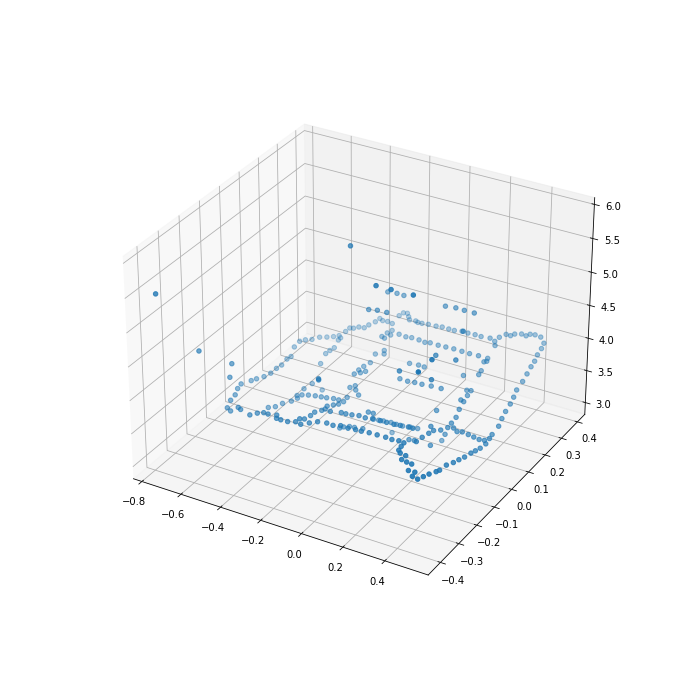

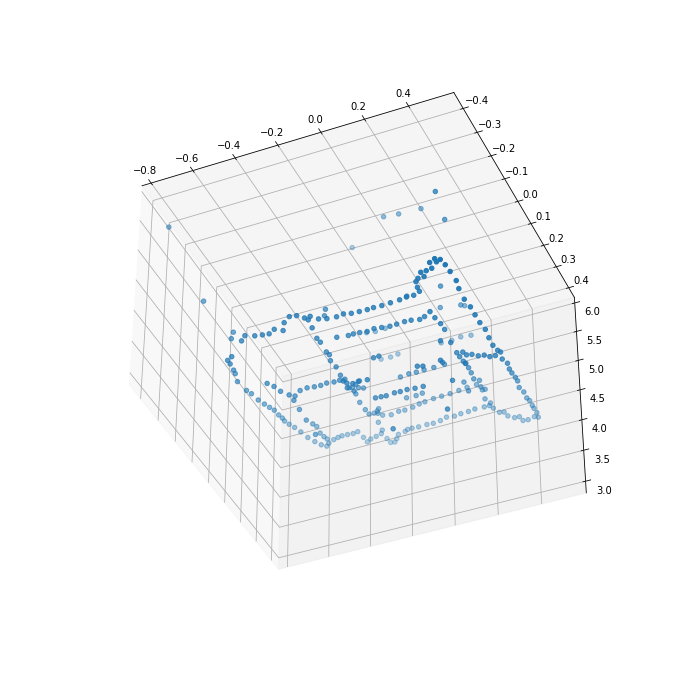

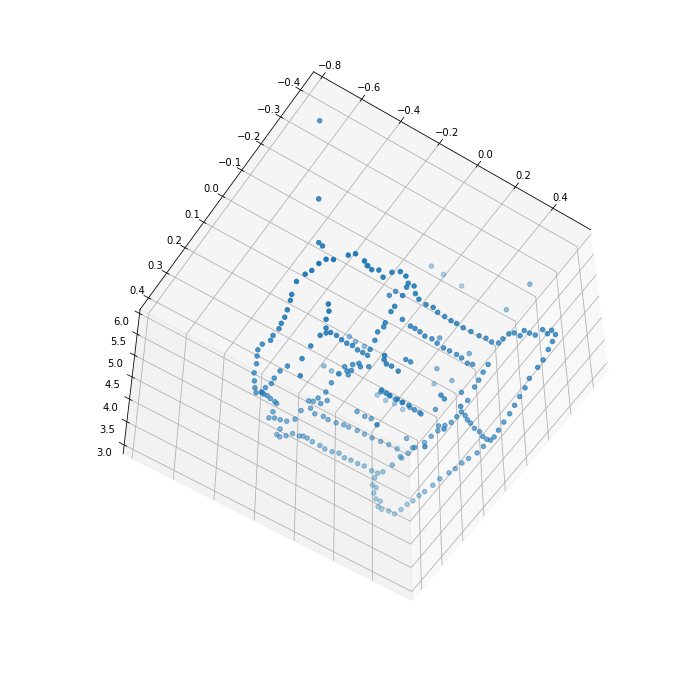

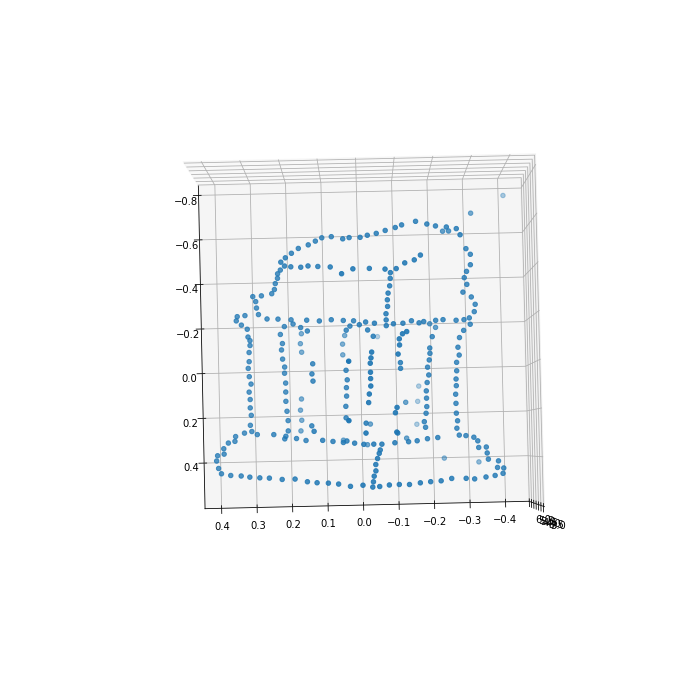

### Q3.3 Bundle Adjustment

<span style='color:red'>**Output:**</span> In your write-up: include an image of output of the `plot_3D_dual` function by passing in the original 3D points and the optimized points. Also include the before and after reprojection error for the `rodriguesResidual` function.

First off, here are the projection errors before and after my `rodriguesResidual()` function. I wasn't able to get a good reconstruction until I had tuned RANSAC to suggest a better initial guess, when I started with a loose RANSAC results the error started at $\approx$17,000 and ended at $\approx$300. Tightening RANSAC to get a better solution (347, below) resulted in a nice low final error.

Before 347.1649703432219, After 9.515508068588574

Here are a collection of images of the adjusted noisy points visualized, showing them from a few different angles.

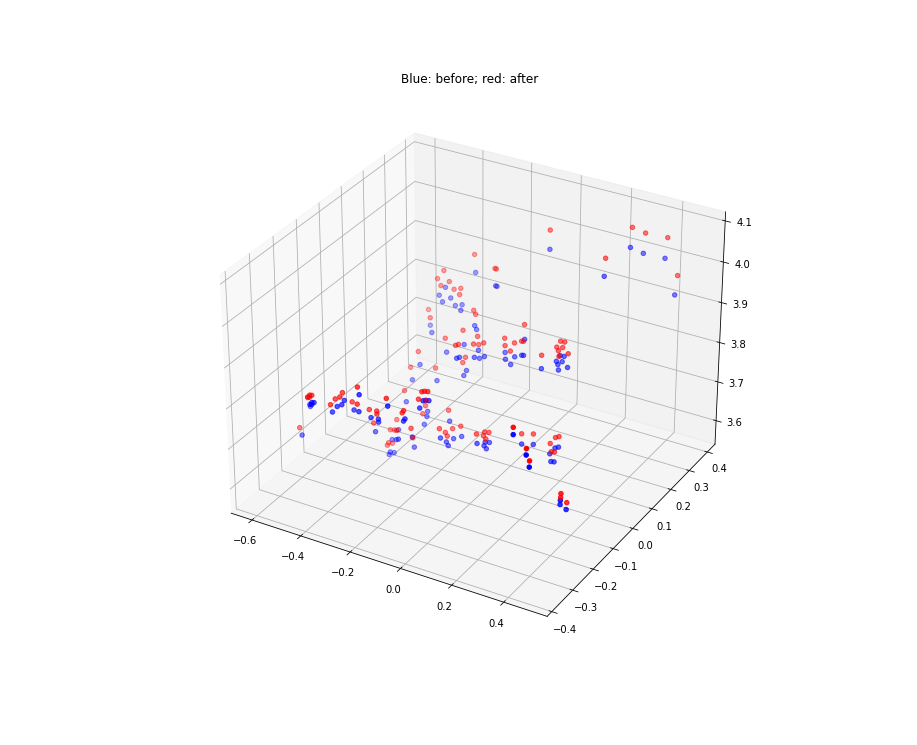

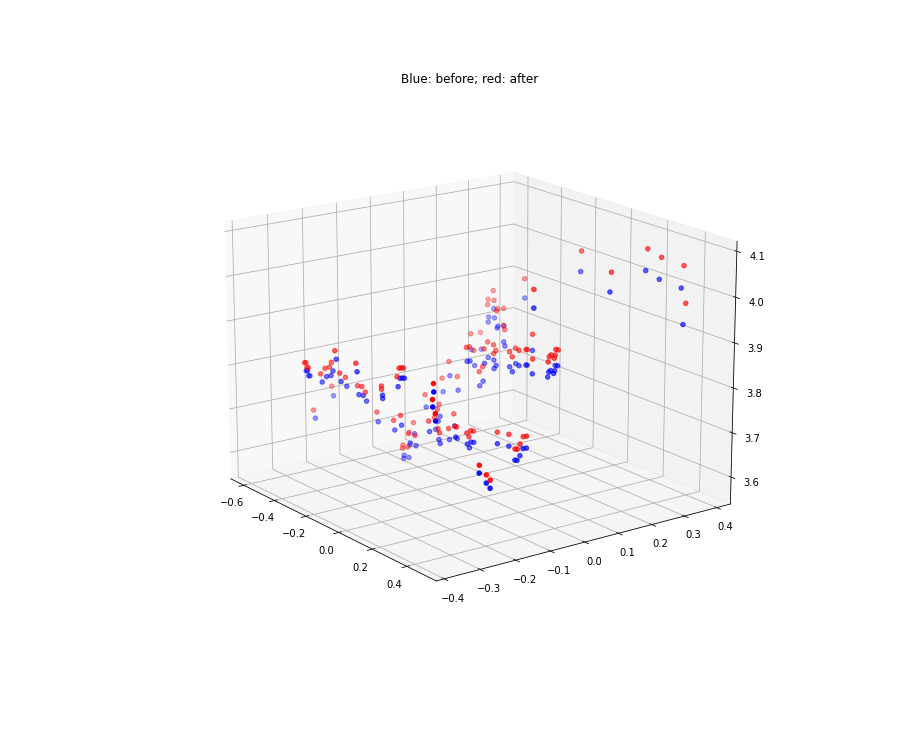

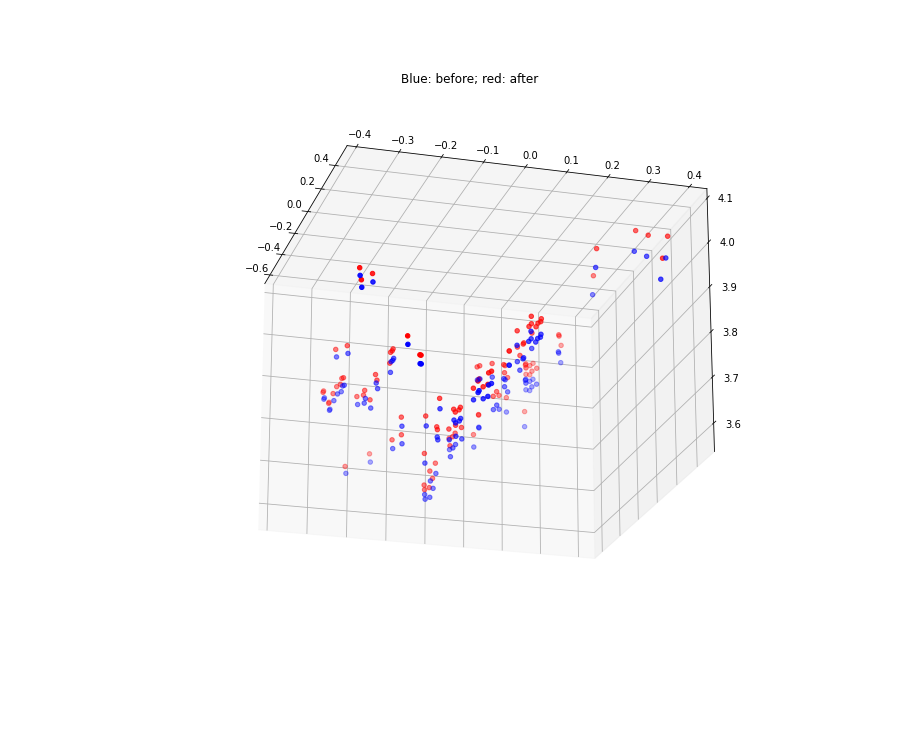

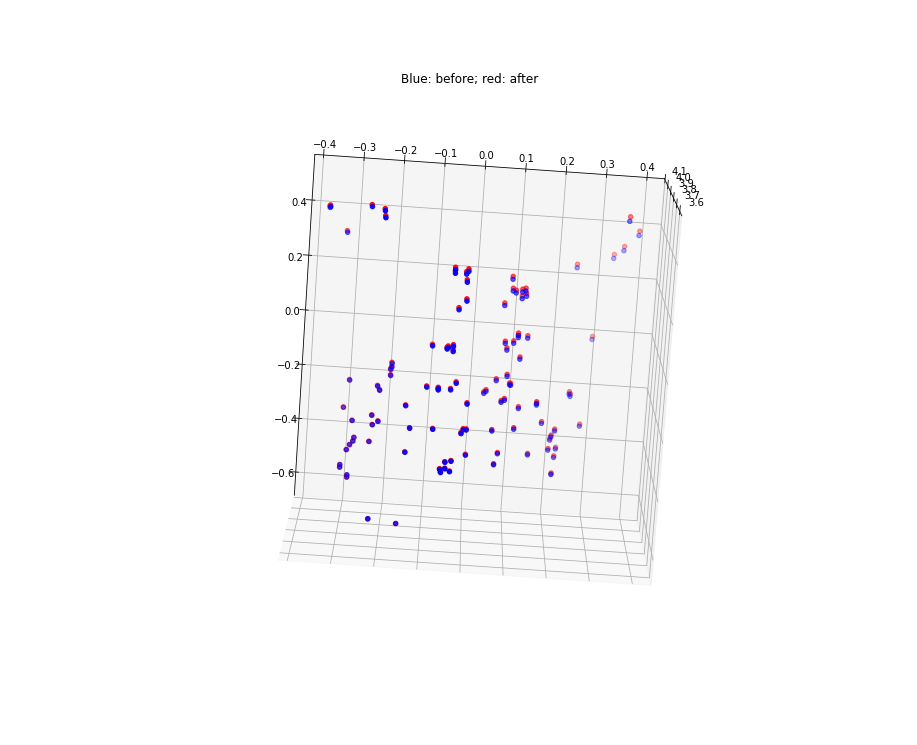